## Assignment 2 Report

## Assigment 2 Multinomial Naive Bayes Using Scikit-Learn ( 5 Marks)
<b> Question: </b>

You are provided with the 20 Newsgroups dataset, a collection of approximately 20,000 newsgroup documents, partitioned across 20 different newsgroups. Your task is to use the Multinomial Naive Bayes algorithm to classify these text documents into their respective categories <b> using the scikit-learn library </b>.

Instructions:

1. <b> Data Loading and Preparation </b>: [1 mark]

- Use the 'fetch_20newsgroups' function from 'sklearn.datasets' to load the dataset.
- Select 5 categories of your choice from the 20 Newsgroups dataset. Ensure that your dataset is balanced, i.e., each category should have an approximately equal number of documents.
- Preprocess the text data by converting it to lowercase and remove stopwords.

2. <b> Model Implementation: </b> [2 marks]

- Use 'TfidfVectorizer' to convert the text data into a Tf-Idf representation (Hint: from sklearn.feature_extraction.text import TfidfVectorizer).
- Implement the Multinomial Naive Bayes classifier using 'sklearn.naive_bayes.MultinomialNB' with alpha = 0.01.
- Split the dataset into training and testing sets (e.g., 80% training, 20% testing).


3. <b> Evaluation: </b> [1.5 marks]

- Train your Multinomial Naive Bayes model on the training set.
- Evaluate the model's performance on the test set using accuracy, precision, recall, and F1-score.
- Present a classification report and a confusion matrix for the results.

4. <b> Submission Requirements: </b> [0.5 mark]

- Submit the Python code implementing the solution.
- Provide a brief report (300-500 words) explaining your approach, the distribution of data across the selected categories, the preprocessing steps, and the results obtained.

## Solution - Step1 Data Preparation
1. The program fetches all documents using subset='all' for getting both test and train.
2. Subsequently, it retrieves all categories in the datasets and gets category of each document.
3. It calculates the number of documents in each category
4. There will be a ulity function and it will be used to remove stopwords, lower characters after removing punctuations.
5. The 'stopwords' from nltk library will be used. The 'stopwords' contains words of all languages. Only English stopwords is used.
    

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import datasets
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups

In [2]:
import string
import nltk
from nltk import corpus
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\seman\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Load the dataset without specifying categories
newsgroups_data = fetch_20newsgroups(subset='all') #Loading all documents test & train

# List all available categories
# Get the category names
categories = newsgroups_data.target_names
print(categories)
# Get the target of each document
targets = newsgroups_data.target

print(len(targets))
category_counts = np.bincount(targets)
for category, count in zip(categories, category_counts):
    print(f"{category}: {count} documents")
    
categories = ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.politics.guns', 'rec.sport.hockey']
newsgroups = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)# List all available categories


['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
18846
alt.atheism: 799 documents
comp.graphics: 973 documents
comp.os.ms-windows.misc: 985 documents
comp.sys.ibm.pc.hardware: 982 documents
comp.sys.mac.hardware: 963 documents
comp.windows.x: 988 documents
misc.forsale: 975 documents
rec.autos: 990 documents
rec.motorcycles: 996 documents
rec.sport.baseball: 994 documents
rec.sport.hockey: 999 documents
sci.crypt: 991 documents
sci.electronics: 984 documents
sci.med: 990 documents
sci.space: 987 documents
soc.religion.christian: 997 documents
talk.politics.guns: 910 documents
talk.politics.mideast: 940 documents
talk.politics.misc: 775 documents
t

## Identify Categories & Balance the dataframe
From the above list, categories where number of documents between 970 to 999, are identified. 
So, categories of interest - comp.graphics, sci.space, rec.sport.hockey, sci.med, sci.electronics 
To balance the df, following are performed:
1. By grouping the df by 'target' column implying that the df is divided into groups by the particular category (example, 'comp.graphics')
2. For each group created in step 1, python lambda function which samples min_docs_per_category rows from each group x, is applied.
3. min_docs_per_category is the minimum number of documents across all categories, ensuring that each group contributes an equal number of samples.
4. random_state=42 ensures that the sampling process is reproducible, meaning that every time this code is run, there will be the same subset of samples from each category.

In [4]:
categories = ['sci.med', 'comp.graphics', 'sci.space', 'sci.electronics', 'rec.sport.hockey']
#newsgroups = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)# List train dataset
#Apply the following - random_state=42 for reproducible results everytime
newsgroups = fetch_20newsgroups(subset='all', categories=categories, shuffle=True, random_state=42)# List full dataset
df = pd.DataFrame({'data': newsgroups.data, 'target': newsgroups.target})
category_counts = df['target'].value_counts()
print("Documents per category:\n", category_counts)
min_docs_per_category = category_counts.min()
balanced_df = df.groupby('target').apply(lambda x: x.sample(min_docs_per_category, random_state=42)).reset_index(drop=True)
print("Balanced dataset:\n", balanced_df['target'].value_counts())


Documents per category:
 target
1    999
3    990
4    987
2    984
0    973
Name: count, dtype: int64
Balanced dataset:
 target
0    973
1    973
2    973
3    973
4    973
Name: count, dtype: int64


## Utility function:
To:
1. covert the text into lower after removing punctuations.
2. removing stopwords for English

In [6]:
def clean_util(text):
    punc_rmv = [char for char in text if char not in string.punctuation] # Punctuation remove
    punc_rmv = "".join(punc_rmv)
    # Removing Stopwords (i.e., "a", "an", "the", "and", "but", "in", "on", "of", and "with" etc.) 
    stopword_rmv = [w.strip().lower() for w in punc_rmv.split() if w.strip().lower() not in stopwords.words('english')] 

    return " ".join(stopword_rmv)

## Apply cleaning below

In [ ]:
balanced_df['data'] = balanced_df['data'].apply(clean_util)

In [7]:
df

data  target
0     From: ac940@Freenet.carleton.ca (Lau Hon-Wah)\...       3
1     From: leech@cs.unc.edu (Jon Leech)\nSubject: S...       4
2     From: dyer@spdcc.com (Steve Dyer)\nSubject: Re...       3
3     From: archer@elysium.esd.sgi.com (Archer (Bad ...       1
4     From: sasghm@theseus.unx.sas.com (Gary Merrill...       3
...                                                 ...     ...
4928  From: shafer@rigel.dfrf.nasa.gov (Mary Shafer)...       4
4929  From: stamber@rainbow.ecn.purdue.edu (Kevin L....       1
4930  From: gjp@sei.cmu.edu (George Pandelios)\nSubj...       1
4931  From: kwp@wag.caltech.edu (Kevin W. Plaxco)\nS...       4
4932  From: ralph.buttigieg@f635.n713.z3.fido.zeta.o...       4

[4933 rows x 2 columns]

## Train the Multinomial Naiva Bayes Classifier
1. As per the instruction 'TfidfVectorizer' of sklearn.feature_extraction.text library is used to convert the text data into numerical values by calculating TF-IDF score of each word in the corpus.
2. max_features=5000: It limits the number of features (words) to the top 5000 terms based on their TF-IDF scores. Only English stopwords are removed.
3. Next fit_transform is applied. It performs two operations 'fit' and 'transform'. The 'fit' operation is for learning the vocabulary from texts (top 5000 words). The 'transform' operation converts the texts into a sparse matrix where each row represents a document and each column is a word.
4. Next the dataset is divided into test and train (80% train and 20% test)
5. Multinomial Naive Bayes classifier using 'sklearn.naive_bayes.MultinomialNB' with alpha = 0.01 (smoothing parameter used in Naive Bayes to avoid zero probabilities during classification. ) model is created. The model used for classification.

In [8]:
#main model implementation - training portion

texts = balanced_df['data']
y = balanced_df['target']

vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(texts)
# Applying random_state=42 for reproducable results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
nb = MultinomialNB(alpha=0.01)
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

## Model Performance

Accuracy: 0.9609
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       210
           1       0.99      0.99      0.99       194
           2       0.95      0.95      0.95       193
           3       0.98      0.96      0.97       181
           4       0.97      0.95      0.96       195

    accuracy                           0.96       973
   macro avg       0.96      0.96      0.96       973
weighted avg       0.96      0.96      0.96       973



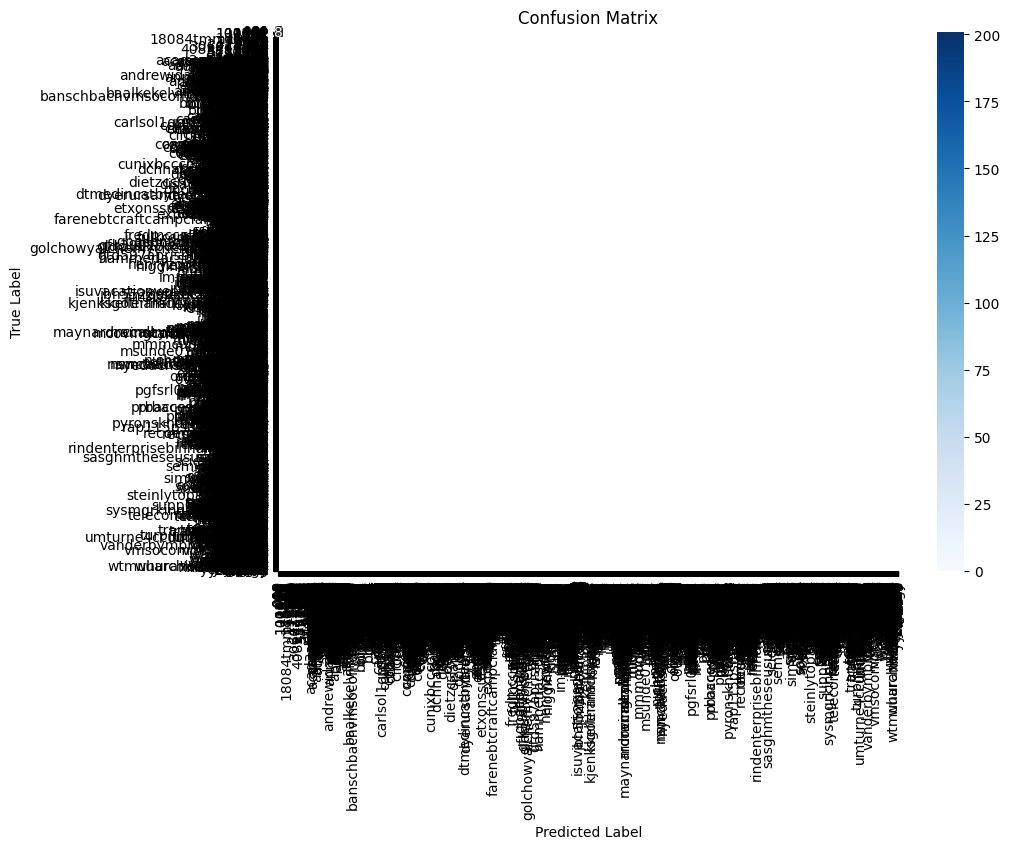

In [10]:
#model performance

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=vectorizer.get_feature_names_out(), yticklabels=vectorizer.get_feature_names_out())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

## Discussions on results
Accuracy = 0.9609 or 96.09%, So, the model correctly predicted 96.09% of the labels(i.e. categories) in test dataset, which is commendable. 
<b>Classification Report</b> <br>
Precision - The percentage of correctly predicted labels(categories) out of all predictions made for that class. For all classes, precision 0.92 to 0.98, which is reasonably good.<br>
recall - The percentage of true labels that were correctly predicted. For example, For class 0, Recall = 0.96 means that 96% of all actual class 0 documents were correctly predicted as class 0.<br>
f1-score - The harmonic mean of precision and recall. For class 0, f1-score = 0.94 shows the balance between precision and recall. <br>
Support - The number of true instances for each class. For example, there are 210 instances of class 0 in the testset. <br>

<b>Overall:</b>
macro avg - The unweighted average of precision, recall, and f1-score across all classes.
weighted avg - A weighted average of the precision, recall, and f1-score, where each class (category) is weighted by its support (i.e., its number of documents).